In [ ]:
import igraph as ig
from igraph import plot
import sys

In [ ]:
def graph_plot(graph, x_box, y_box, color, layout_type):
    # Instância Graph
    G = ig.Graph()

    # Separando chaves do dicionário
    graph_keys = list(graph.keys())

    # Adicionando n vértices no grafo
    G.add_vertices(len(graph_keys))

    # Encontrando índices das arestas e as adicionando no grafo
    graph_edges = []

    for i, key in enumerate(graph_keys):
        for j in graph[key]:
            if not (graph_keys.index(j), i) in graph_edges:
                graph_edges.append((i, graph_keys.index(j)))

    G.add_edges(graph_edges)

    # Plotagem do grafo
    box = (x_box, y_box)
    layout = G.layout(layout_type) # circle, drl, fr, kk, large, random, rt, rt_circular
    colors = [color] * len(graph_keys)
    return plot(G, layout=layout, bbox = box, vertex_label=graph_keys, vertex_color=colors)

In [ ]:
def distancia(cidade1, cidade2):
    # Função para calcular a distância entre duas cidades (pode ser a distância euclidiana, por exemplo)
    return ((cidade1[0] - cidade2[0])**2 + (cidade1[1] - cidade2[1])**2)**0.5

In [ ]:
def vizinho_mais_proximo(cidades):
    num_cidades = len(cidades)
    visitados = [False] * num_cidades
    caminho = [0]  # Começamos a partir da primeira cidade

    visitados[0] = True

    for _ in range(num_cidades - 1):
        cidade_atual = caminho[-1]
        cidade_mais_proxima = None
        menor_distancia = sys.maxsize

        for proxima_cidade in range(num_cidades):
            if not visitados[proxima_cidade]:
                d = distancia(cidades[cidade_atual], cidades[proxima_cidade])
                if d < menor_distancia:
                    menor_distancia = d
                    cidade_mais_proxima = proxima_cidade

        caminho.append(cidade_mais_proxima)
        visitados[cidade_mais_proxima] = True

    # Adicionar a última aresta de volta para a cidade inicial para formar um ciclo
    caminho.append(caminho[0])

    return caminho


In [ ]:
cidades = [(0, 0), (1, 2), (2, 4), (3, 1), (4, 3)]
caminho_otimo = vizinho_mais_proximo(cidades)
caminho_otimo

[0, 1, 2, 4, 3, 0]

In [ ]:
graph = {}
for index in range(0, len(caminho_otimo)):
  print(index)
  if index == len(caminho_otimo) - 2:
    graph.update({f'{caminho_otimo[index]}' : f'{caminho_otimo[0]}'})
    break
  graph.update({f'{caminho_otimo[index]}' : f'{caminho_otimo[index+1]}'})

graph

0
1
2
3
4


{'0': '1', '1': '2', '2': '4', '4': '3', '3': '0'}

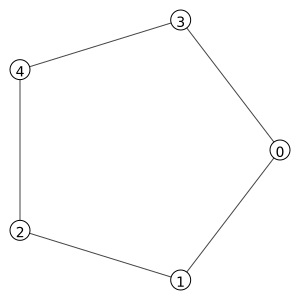

In [ ]:
graph_plot(graph, 300, 300, 'white', 'circle')